In [ ]:
import warnings as Nws_Fkewss
Nws_Fkewss.filterwarnings("ignore")
import pandas as Nws_Fkepnn

In [ ]:
Nws_Fke = Nws_Fkepnn.read_csv('purr_FA-KES-Dataset.csv', encoding='unicode_escape')
Nws_Fke

,article_content,labels
0,wed apr syria attack symptoms consistent nerve...,0
1,fri apr homs governor says u attack caused dea...,0
2,sun apr death toll aleppo bomb attack least de...,0
3,wed apr aleppo bomb blast kills six syrian sta...,0
4,sun jul syria rebels dead fighting key aleppo ...,0
...,...,...
793,turkish bombardment kills civilians syria turk...,1
794,martyrs terrorists shell aleppos salah eddin s...,1
795,chemical attack kills five syrians aleppo sana...,0
796,killed russian military chopper shot syria fiv...,1


In [ ]:
Nws_Fke['labels'].value_counts()

1    423
0    375
Name: labels, dtype: int64

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer as Nws_Fkecnv

Nws_Fke_anl = Nws_Fkecnv(analyzer='char', ngram_range= (1,1))
Nws_Fke_x = Nws_Fke_anl.fit_transform(Nws_Fke['article_content'].values.astype('U')).toarray()

In [ ]:
print(Nws_Fke_x)

[[221 153  14 ...   5  32   1]
 [215 149  25 ...   0  29   6]
 [145  92  27 ...   1  21   0]
 ...
 [138  83  11 ...   2  17   2]
 [138  60  10 ...   2  26   1]
 [264 185  22 ...   3  34   9]]


In [ ]:
Nws_Fke_y = Nws_Fke['labels']

In [ ]:
from imblearn.over_sampling import SMOTE as Nws_Fke_sme
from collections import Counter as Nws_Fke_cttr
print('Original Nws_Fke datashape %s' % Nws_Fke_cttr(Nws_Fke_y))
Nws_Fke_MM = Nws_Fke_sme()
Nws_Fke_x, Nws_Fke_y = Nws_Fke_MM.fit_resample(Nws_Fke_x, Nws_Fke_y)
print('Resampled Nws_Fke datashape %s' % Nws_Fke_cttr(Nws_Fke_y))


Original Nws_Fke datashape Counter({1: 423, 0: 375})
Resampled Nws_Fke datashape Counter({0: 423, 1: 423})


In [ ]:
Nws_Fke_x.shape

(846, 27)

In [ ]:
Nws_Fke_y.shape

(846,)

In [ ]:
from sklearn.model_selection import train_test_split as Nws_Fkennes

Nws_si =0.4
Nws_rs = 31
Nws_sii =0.5

In [ ]:
Nws_Fke_xN, Nws_Fke_xS, Nws_Fke_yN, Nws_Fke_yS = Nws_Fkennes(Nws_Fke_x, Nws_Fke_y, test_size=Nws_si, random_state= Nws_rs)
Nws_Fke_xV, Nws_Fke_xS, Nws_Fke_yV, Nws_Fke_yS = Nws_Fkennes(Nws_Fke_xS, Nws_Fke_yS, test_size= Nws_sii, random_state= Nws_rs)

print(Nws_Fke_xN.shape)
print(Nws_Fke_xV.shape)
print(Nws_Fke_xS.shape)

(507, 27)
(169, 27)
(170, 27)


### Linear ML models

In [ ]:
from sklearn.metrics import classification_report as Nws_Fkeclc
from sklearn.metrics import confusion_matrix as Nws_Fkecos
from sklearn.metrics import ConfusionMatrixDisplay as Nws_Fkecud
from sklearn.model_selection import GridSearchCV as Nws_Fkegrs
import time as Nws_Fketme

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression as Nws_Fkelst

Nws_parm = { 'penalty': ['l2','l1','elasticnet',None],
               'solver': ['lbfgs','sag','saga','liblinear'],
               'C':[1.0,2.0,3.0,4.0]}


Nws_parm_Vo = Nws_Fkelst(random_state= Nws_rs)
Nws_parm_Vo = Nws_Fkegrs(Nws_parm_Vo, Nws_parm,
                          cv=2, verbose=10)
Nws_parm_Vo.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print(Nws_parm_Vo.best_params_)
print("score-Nws_Fke: ", Nws_parm_Vo.best_score_)

Fitting 2 folds for each of 64 candidates, totalling 128 fits
[CV 1/2; 1/64] START C=1.0, penalty=l2, solver=lbfgs............................
[CV 1/2; 1/64] END C=1.0, penalty=l2, solver=lbfgs;, score=0.620 total time=   0.0s
[CV 2/2; 1/64] START C=1.0, penalty=l2, solver=lbfgs............................
[CV 2/2; 1/64] END C=1.0, penalty=l2, solver=lbfgs;, score=0.620 total time=   0.0s
[CV 1/2; 2/64] START C=1.0, penalty=l2, solver=sag..............................
[CV 1/2; 2/64] END C=1.0, penalty=l2, solver=sag;, score=0.620 total time=   0.0s
[CV 2/2; 2/64] START C=1.0, penalty=l2, solver=sag..............................
[CV 2/2; 2/64] END C=1.0, penalty=l2, solver=sag;, score=0.600 total time=   0.0s
[CV 1/2; 3/64] START C=1.0, penalty=l2, solver=saga.............................
[CV 1/2; 3/64] END C=1.0, penalty=l2, solver=saga;, score=0.540 total time=   0.0s
[CV 2/2; 3/64] START C=1.0, penalty=l2, solver=saga.............................
[CV 2/2; 3/64] END C=1.0, penalty=l2,


 training period: 0.03591489791870117 

              precision    recall  f1-score   support

           0       0.49      0.41      0.45        82
           1       0.52      0.60      0.56        87

    accuracy                           0.51       169
   macro avg       0.51      0.51      0.50       169
weighted avg       0.51      0.51      0.50       169


 validation period: 0.08562994003295898 



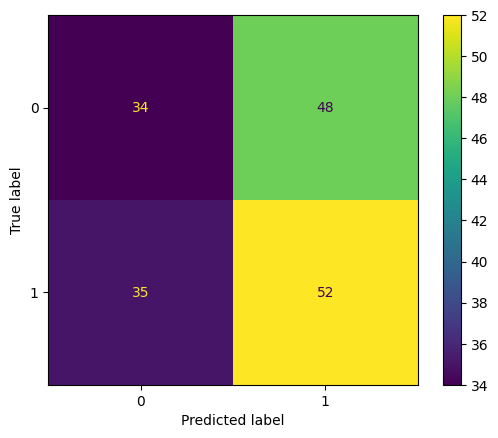

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl1= Nws_Fkelst(**Nws_parm_Vo.best_params_)
Nws_Fke_Mdl1.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl1.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.49      0.41      0.44        88
           1       0.46      0.54      0.49        82

    accuracy                           0.47       170
   macro avg       0.47      0.47      0.47       170
weighted avg       0.47      0.47      0.47       170


 testing period: 0.057950735092163086 



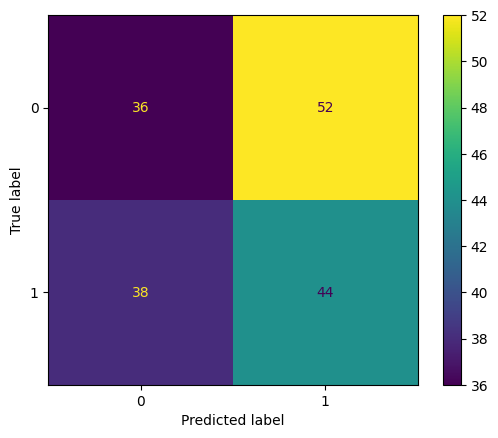

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl1.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### Passive Aggressive Classifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier as Nws_Fkepvag

Nws_parm = { 'C': [1.0,3.0,5.0,6.0,7.0],
               'max_iter': [1000,1100,1200,1300],
               'tol':[1e-3,1e-4,1e-5,1e-6,1e-7]}


Nws_parm_Vo = Nws_Fkepvag(random_state= Nws_rs)
Nws_parm_Vo = Nws_Fkegrs(Nws_parm_Vo, Nws_parm,
                          cv=2, verbose=10)
Nws_parm_Vo.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print(Nws_parm_Vo.best_params_)
print("score-Nws_Fke: ", Nws_parm_Vo.best_score_)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[CV 1/2; 1/100] START C=1.0, max_iter=1000, tol=0.001...........................
[CV 1/2; 1/100] END C=1.0, max_iter=1000, tol=0.001;, score=0.520 total time=   0.0s
[CV 2/2; 1/100] START C=1.0, max_iter=1000, tol=0.001...........................
[CV 2/2; 1/100] END C=1.0, max_iter=1000, tol=0.001;, score=0.500 total time=   0.0s
[CV 1/2; 2/100] START C=1.0, max_iter=1000, tol=0.0001..........................
[CV 1/2; 2/100] END C=1.0, max_iter=1000, tol=0.0001;, score=0.520 total time=   0.0s
[CV 2/2; 2/100] START C=1.0, max_iter=1000, tol=0.0001..........................
[CV 2/2; 2/100] END C=1.0, max_iter=1000, tol=0.0001;, score=0.500 total time=   0.0s
[CV 1/2; 3/100] START C=1.0, max_iter=1000, tol=1e-05...........................
[CV 1/2; 3/100] END C=1.0, max_iter=1000, tol=1e-05;, score=0.520 total time=   0.0s
[CV 2/2; 3/100] START C=1.0, max_iter=1000, tol=1e-05...........................
[CV 2/2; 3/100] END C=1.


 training period: 0.0055468082427978516 

              precision    recall  f1-score   support

           0       0.48      0.74      0.58        82
           1       0.49      0.23      0.31        87

    accuracy                           0.48       169
   macro avg       0.48      0.49      0.45       169
weighted avg       0.48      0.48      0.44       169


 validation period: 0.06403899192810059 



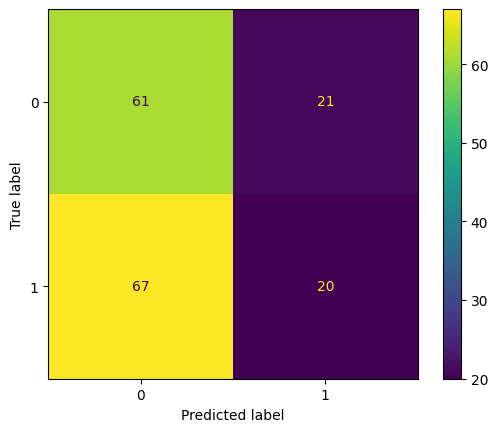

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl2= Nws_Fkepvag(**Nws_parm_Vo.best_params_)
Nws_Fke_Mdl2.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl2.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.48      0.62      0.54        88
           1       0.41      0.28      0.33        82

    accuracy                           0.46       170
   macro avg       0.45      0.45      0.44       170
weighted avg       0.45      0.46      0.44       170


 testing period: 0.053874969482421875 



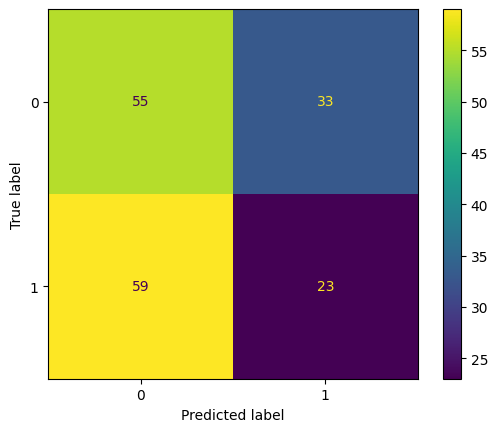

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl2.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### LinearSVC

In [ ]:
from sklearn.svm import LinearSVC as Nws_Fkelisv

Nws_parm = { 'penalty': ['l1','l2'],
               'loss': ['squared_hinge','hinge'],
               'C':[2.0,3.0,4.0,5.0]}


Nws_parm_Vo = Nws_Fkelisv(random_state= Nws_rs)
Nws_parm_Vo = Nws_Fkegrs(Nws_parm_Vo, Nws_parm,
                          cv=2, verbose=10)
Nws_parm_Vo.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print(Nws_parm_Vo.best_params_)
print("score-Nws_Fke: ", Nws_parm_Vo.best_score_)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV 1/2; 1/16] START C=2.0, loss=squared_hinge, penalty=l1......................
[CV 1/2; 1/16] END C=2.0, loss=squared_hinge, penalty=l1;, score=nan total time=   0.0s
[CV 2/2; 1/16] START C=2.0, loss=squared_hinge, penalty=l1......................
[CV 2/2; 1/16] END C=2.0, loss=squared_hinge, penalty=l1;, score=nan total time=   0.0s
[CV 1/2; 2/16] START C=2.0, loss=squared_hinge, penalty=l2......................
[CV 1/2; 2/16] END C=2.0, loss=squared_hinge, penalty=l2;, score=0.600 total time=   0.0s
[CV 2/2; 2/16] START C=2.0, loss=squared_hinge, penalty=l2......................
[CV 2/2; 2/16] END C=2.0, loss=squared_hinge, penalty=l2;, score=0.680 total time=   0.0s
[CV 1/2; 3/16] START C=2.0, loss=hinge, penalty=l1..............................
[CV 1/2; 3/16] END .C=2.0, loss=hinge, penalty=l1;, score=nan total time=   0.0s
[CV 2/2; 3/16] START C=2.0, loss=hinge, penalty=l1..............................
[CV 2/2; 3/16] E


 training period: 0.07760071754455566 

              precision    recall  f1-score   support

           0       0.49      0.63      0.55        82
           1       0.52      0.37      0.43        87

    accuracy                           0.50       169
   macro avg       0.50      0.50      0.49       169
weighted avg       0.50      0.50      0.49       169


 validation period: 0.12520146369934082 



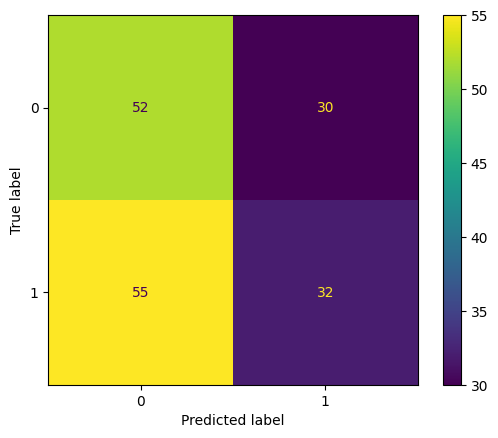

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl3= Nws_Fkelisv(**Nws_parm_Vo.best_params_)
Nws_Fke_Mdl3.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl3.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.51      0.62      0.56        88
           1       0.47      0.35      0.40        82

    accuracy                           0.49       170
   macro avg       0.49      0.49      0.48       170
weighted avg       0.49      0.49      0.48       170


 testing period: 0.12543082237243652 



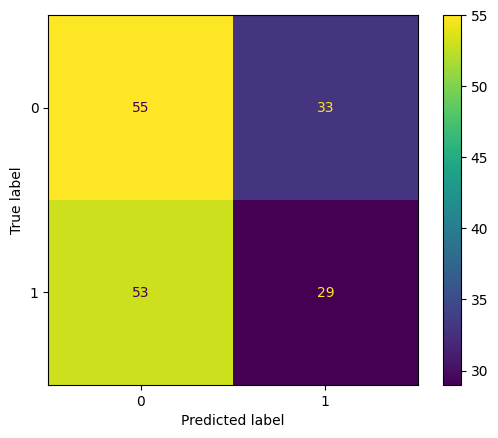

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl3.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

### Boosting models

#### XGBM

In [ ]:
from xgboost import XGBClassifier as Nws_Fkexgrb

Nws_parm = { 'subsample': [0.03,0.07,0.08,0.06],
              'learning_rate': [0.01,0.02,0.04,0.05],
              'n_estimators':[20,30,40,50,60]}


Nws_parm_Vo = Nws_Fkexgrb(random_state= Nws_rs)
Nws_parm_Vo = Nws_Fkegrs(Nws_parm_Vo, Nws_parm,
                          cv=2, verbose=10)
Nws_parm_Vo.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print(Nws_parm_Vo.best_params_)
print("score-Nws_Fke: ", Nws_parm_Vo.best_score_)

Fitting 2 folds for each of 80 candidates, totalling 160 fits
[CV 1/2; 1/80] START learning_rate=0.01, n_estimators=20, subsample=0.03........
[CV 1/2; 1/80] END learning_rate=0.01, n_estimators=20, subsample=0.03;, score=0.520 total time=   0.1s
[CV 2/2; 1/80] START learning_rate=0.01, n_estimators=20, subsample=0.03........
[CV 2/2; 1/80] END learning_rate=0.01, n_estimators=20, subsample=0.03;, score=0.500 total time=   0.0s
[CV 1/2; 2/80] START learning_rate=0.01, n_estimators=20, subsample=0.07........
[CV 1/2; 2/80] END learning_rate=0.01, n_estimators=20, subsample=0.07;, score=0.480 total time=   0.0s
[CV 2/2; 2/80] START learning_rate=0.01, n_estimators=20, subsample=0.07........
[CV 2/2; 2/80] END learning_rate=0.01, n_estimators=20, subsample=0.07;, score=0.500 total time=   0.2s
[CV 1/2; 3/80] START learning_rate=0.01, n_estimators=20, subsample=0.08........
[CV 1/2; 3/80] END learning_rate=0.01, n_estimators=20, subsample=0.08;, score=0.480 total time=   0.0s
[CV 2/2; 3/80


 training period: 0.04225277900695801 

              precision    recall  f1-score   support

           0       0.53      0.43      0.47        82
           1       0.54      0.64      0.59        87

    accuracy                           0.54       169
   macro avg       0.54      0.54      0.53       169
weighted avg       0.54      0.54      0.53       169


 validation period: 0.14490509033203125 



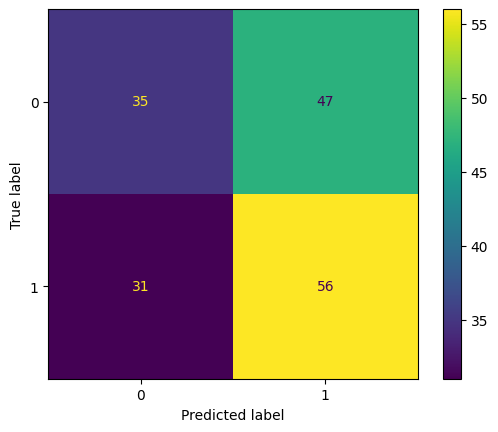

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl4= Nws_Fkexgrb(**Nws_parm_Vo.best_params_)
Nws_Fke_Mdl4.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl4.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.45      0.43      0.44        88
           1       0.42      0.44      0.43        82

    accuracy                           0.44       170
   macro avg       0.44      0.44      0.44       170
weighted avg       0.44      0.44      0.44       170


 testing period: 0.05697488784790039 



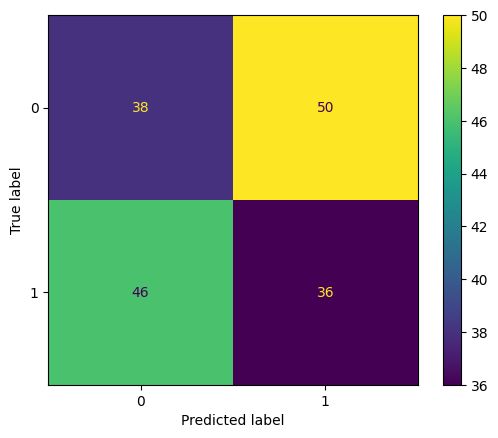

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl4.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### LightGBM

In [ ]:
from lightgbm import LGBMClassifier as Nws_Fkeligb

Nws_parm = { 'num_leaves': [2,4,6,8],
              'max_depth': [3,5,7,9],
              'n_estimators':[10,30,40,50,60]}


Nws_parm_Vo = Nws_Fkeligb(random_state= Nws_rs)
Nws_parm_Vo = Nws_Fkegrs(Nws_parm_Vo, Nws_parm,
                          cv=2, verbose=10)
Nws_parm_Vo.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print(Nws_parm_Vo.best_params_)
print("score-Nws_Fke: ", Nws_parm_Vo.best_score_)

Streaming output truncated to the last 5000 lines.
[CV 2/2; 15/80] END max_depth=3, n_estimators=50, num_leaves=6;, score=0.580 total time=   0.0s
[CV 1/2; 16/80] START max_depth=3, n_estimators=50, num_leaves=8................
[LightGBM] [Info] Number of positive: 25, number of negative: 25
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 393
[LightGBM] [Info] Number of data points in the train set: 50, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[LightGBM] [Info] Number of positive: 254, number of negative: 253
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000303 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2037
[LightGBM] [Info] Number of data points in the train set: 507, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500986 -> initscore=0.003945
[LightGBM] [Info] Start training from score 0.003945

 training period: 0.020074129104614258 

              precision    recall  f1-score   support

           0       0.59      0.43      0.50        82
           1       0.57      0.72      0.64        87

    accuracy                           0.58       169
   macro avg       0.58      0.58      0.57       169
weighted avg       0.58      0.58      0.57       169


 validation period: 0.05448102951049805 



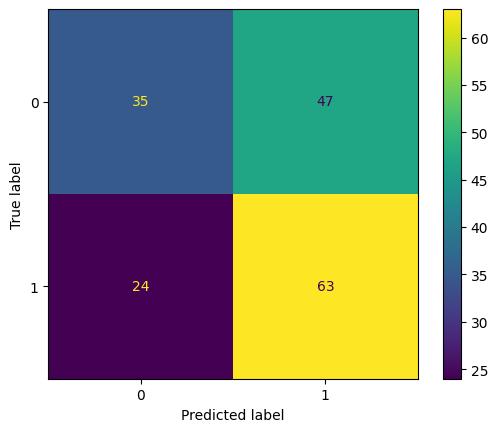

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl5= Nws_Fkeligb(**Nws_parm_Vo.best_params_)
Nws_Fke_Mdl5.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl5.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.46      0.36      0.41        88
           1       0.44      0.54      0.48        82

    accuracy                           0.45       170
   macro avg       0.45      0.45      0.44       170
weighted avg       0.45      0.45      0.44       170


 testing period: 0.05543923377990723 



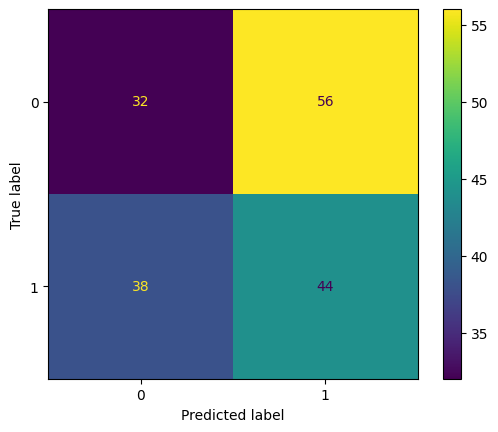

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl5.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")

#### CatBoost

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.4 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier as Nws_Fkecttb

Nws_parm = { 'learning_rate': [0.01,0.02,0.03,0.04],
              'n_estimators': [10,20,40,70],
              'max_depth':[3,5,6,8]}


Nws_parm_Vo = Nws_Fkecttb(random_state= Nws_rs)
Nws_parm_Vo = Nws_Fkegrs(Nws_parm_Vo, Nws_parm,
                          cv=2, verbose=10)
Nws_parm_Vo.fit(Nws_Fke_xN[:100], Nws_Fke_yN[:100])

print(Nws_parm_Vo.best_params_)
print("score-Nws_Fke: ", Nws_parm_Vo.best_score_)

Fitting 2 folds for each of 64 candidates, totalling 128 fits
[CV 1/2; 1/64] START learning_rate=0.01, max_depth=3, n_estimators=10...........
0:	learn: 0.6889147	total: 47ms	remaining: 423ms
1:	learn: 0.6853893	total: 48.1ms	remaining: 192ms
2:	learn: 0.6830000	total: 49.2ms	remaining: 115ms
3:	learn: 0.6812142	total: 50.1ms	remaining: 75.2ms
4:	learn: 0.6782858	total: 51ms	remaining: 51ms
5:	learn: 0.6755103	total: 51.9ms	remaining: 34.6ms
6:	learn: 0.6736605	total: 52.8ms	remaining: 22.6ms
7:	learn: 0.6691835	total: 53.7ms	remaining: 13.4ms
8:	learn: 0.6674045	total: 54.6ms	remaining: 6.07ms
9:	learn: 0.6645944	total: 55.6ms	remaining: 0us
[CV 1/2; 1/64] END learning_rate=0.01, max_depth=3, n_estimators=10;, score=0.500 total time=   0.1s
[CV 2/2; 1/64] START learning_rate=0.01, max_depth=3, n_estimators=10...........
0:	learn: 0.6915853	total: 745us	remaining: 6.71ms
1:	learn: 0.6893166	total: 1.66ms	remaining: 6.63ms
2:	learn: 0.6844447	total: 2.89ms	remaining: 6.74ms
3:	learn: 0.

0:	learn: 0.6926535	total: 1.37ms	remaining: 26ms
1:	learn: 0.6919413	total: 2.6ms	remaining: 23.4ms
2:	learn: 0.6914462	total: 4.73ms	remaining: 26.8ms
3:	learn: 0.6908282	total: 5.98ms	remaining: 23.9ms
4:	learn: 0.6903983	total: 7.21ms	remaining: 21.6ms
5:	learn: 0.6899196	total: 8.41ms	remaining: 19.6ms
6:	learn: 0.6896015	total: 10.3ms	remaining: 19.1ms
7:	learn: 0.6891179	total: 12ms	remaining: 17.9ms
8:	learn: 0.6886218	total: 13.1ms	remaining: 16.1ms
9:	learn: 0.6879615	total: 14.3ms	remaining: 14.3ms
10:	learn: 0.6875587	total: 15.5ms	remaining: 12.7ms
11:	learn: 0.6867466	total: 16.7ms	remaining: 11.1ms
12:	learn: 0.6861001	total: 17.9ms	remaining: 9.65ms
13:	learn: 0.6856558	total: 19.8ms	remaining: 8.49ms
14:	learn: 0.6852363	total: 21.7ms	remaining: 7.24ms
15:	learn: 0.6846396	total: 22.9ms	remaining: 5.72ms
16:	learn: 0.6842006	total: 24.1ms	remaining: 4.25ms
17:	learn: 0.6833945	total: 25.3ms	remaining: 2.81ms
18:	learn: 0.6832426	total: 26.4ms	remaining: 1.39ms
19:	lear

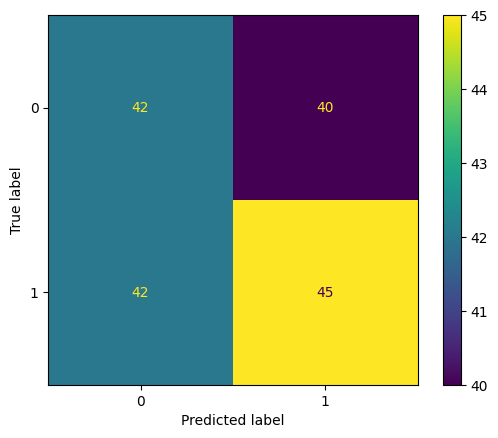

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Mdl6= Nws_Fkecttb(**Nws_parm_Vo.best_params_)
Nws_Fke_Mdl6.fit(Nws_Fke_xN, Nws_Fke_yN)

Nws_pdet2 = Nws_Fketme.time()
print("\n training period:", Nws_pdet2-Nws_pdet1,"\n")


Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl6.predict(Nws_Fke_xV)

print(Nws_Fkeclc(Nws_Fke_yV, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yV,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n validation period:", Nws_pdet2-Nws_pdet1,"\n")

              precision    recall  f1-score   support

           0       0.51      0.55      0.52        88
           1       0.47      0.43      0.45        82

    accuracy                           0.49       170
   macro avg       0.49      0.49      0.49       170
weighted avg       0.49      0.49      0.49       170


 testing period: 0.12703609466552734 



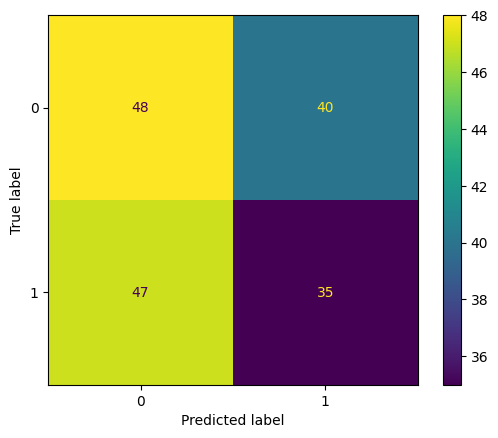

In [ ]:
Nws_pdet1 = Nws_Fketme.time()

Nws_Fke_Pd= Nws_Fke_Mdl6.predict(Nws_Fke_xS)

print(Nws_Fkeclc(Nws_Fke_yS, Nws_Fke_Pd))

Nws_rh = Nws_Fkecos(Nws_Fke_yS,Nws_Fke_Pd)
Nws_sl = Nws_Fkecud(confusion_matrix = Nws_rh, display_labels = [0,1])
Nws_sl.plot()

Nws_pdet2= Nws_Fketme.time()
print("\n testing period:", Nws_pdet2-Nws_pdet1,"\n")